# Dimension Reduction

In [1]:
%matplotlib inline

import matplotlib.pylab as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.decomposition import PCA

# Boston Housing dataset
1. CRIM - per capita crime rate by town
2. ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS - proportion of non-retail business acres per town.
4. CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5. NOX - nitric oxides concentration (parts per 10 million)
6. RM - average number of rooms per dwelling
7. AGE - proportion of owner-occupied units built prior to 1940
8. DIS - weighted distances to five Boston employment centres
9. RAD - index of accessibility to radial highways
10. TAX - full-value property-tax rate per 10000 USD
11. PTRATIO - pupil-teacher ratio by town
12. LSTAT - % lower status of the population
13. MEDV - Median value of owner-occupied homes in 1000 s USD
14. CAT. MEDV - MEDV as categorical data.

In [2]:
bostonHousing_df = pd.read_csv('datasets/BostonHousing.csv')
bostonHousing_df = bostonHousing_df.rename(columns={'CAT. MEDV': 'CAT_MEDV'})
bostonHousing_df.head()


FileNotFoundError: [Errno 2] No such file or directory: 'datasets/BostonHousing.csv'

In [ ]:
bostonHousing_df.describe()

Compute mean, standard deviation, min, max, median, length, and missing values of CRIM

In [ ]:
print('Mean : ', bostonHousing_df.CRIM.mean())
print('Std. dev : ', bostonHousing_df.CRIM.std())
print('Min : ', bostonHousing_df.CRIM.min())
print('Max : ', bostonHousing_df.CRIM.max())
print('Median : ', bostonHousing_df.CRIM.median())
print('Length : ', len(bostonHousing_df.CRIM))
print('Number of missing values : ', bostonHousing_df.CRIM.isnull().sum())

Compute mean, standard dev., min, max, median, length, and missing values for all variables

In [ ]:
pd.DataFrame({'mean': bostonHousing_df.mean(),
              'sd': bostonHousing_df.std(),
              'min': bostonHousing_df.min(),
              'max': bostonHousing_df.max(),
              'median': bostonHousing_df.median(),
              'length': len(bostonHousing_df),
              'miss.val': bostonHousing_df.isnull().sum(),
             })

## Compute Correlation

In [ ]:
bostonHousing_df.corr().round(2)

## Using value_counts() counts(), in pandas to tabulate counts

In [3]:
bostonHousing_df.CHAS.value_counts()

NameError: name 'bostonHousing_df' is not defined

## Number of Rooms (RM)
Create bins of size 1 for variable using the method `pd.cut`. By default, the method creates a categorical variable, e.g. `(6,7]`. The argument `labels=False` determines integers instead, e.g. `6`.

In [4]:
bostonHousing_df['RM_bin'] = pd.cut(bostonHousing_df.RM, range(0, 10), labels=False)
bostonHousing_df.head(5)

NameError: name 'bostonHousing_df' is not defined

Compute the average of MEDV by (binned) RM and CHAS. First group the data frame using the `groupby` method, then restrict the analysis to MEDV and determine the mean for each group.

In [5]:
bostonHousing_df.groupby(['RM_bin', 'CHAS'])['MEDV'].mean()

NameError: name 'bostonHousing_df' is not defined

### To make analysis of data in table easier, we can reshape the data into a more computer-friendly form using Pandas in Python. Pandas.melt() is one of the function to do so.

#### Pandas.melt() unpivots a DataFrame from wide format to long format.  melt() function is useful to massage a dataFrame into a format where one or more columns are identifier variables, while all other columns, considered measured variables, are unpivoted to the row axis, leaving just two non-identifier columns, variable and value.

In [6]:
bostonHousing_df = pd.read_csv('datasets\BostonHousing.csv')
bostonHousing_df = bostonHousing_df.rename(columns={'CAT. MEDV': 'CAT_MEDV'})
bostonHousing_df['RM_bin'] = pd.cut(bostonHousing_df.RM, range(0, 10), labels=False)

FileNotFoundError: [Errno 2] No such file or directory: 'datasets\\BostonHousing.csv'

In [7]:
mlt = pd.melt(bostonHousing_df, id_vars=['RM_bin', 'CHAS'], value_vars=['MEDV'])
mlt.head()

NameError: name 'bostonHousing_df' is not defined

In [8]:
pd.pivot_table(mlt, values='value', index=['RM_bin'], columns=['CHAS'], aggfunc=np.mean, margins=True)

NameError: name 'mlt' is not defined

In [9]:
pd.pivot_table(bostonHousing_df, values='MEDV', index=['RM_bin'], columns=['CHAS'], aggfunc=np.mean, margins=True)

NameError: name 'bostonHousing_df' is not defined

## CODE FOR STACKED BAR CHART
Use the method `pd.crosstab` for cross tabulation of two variables. In a second step, we convert the counts into percentages along the columns.

In [14]:
tbl = pd.crosstab(bostonHousing_df.CAT_MEDV, bostonHousing_df.ZN)
propTbl = tbl / tbl.sum()
propTbl.round(2)

ZN,0.0,12.5,17.5,18.0,20.0,21.0,22.0,25.0,28.0,30.0,...,55.0,60.0,70.0,75.0,80.0,82.5,85.0,90.0,95.0,100.0
CAT_MEDV,,,,,,,,,,,,,,,,,,,,,
0,0.91,1.0,0.0,1.0,0.24,1.0,0.9,1.0,1.0,1.0,...,0.67,0.75,1.0,0.33,0.67,0.5,1.0,0.0,0.0,0.0
1,0.09,0.0,1.0,0.0,0.76,0.0,0.1,0.0,0.0,0.0,...,0.33,0.25,0.0,0.67,0.33,0.5,0.0,1.0,1.0,1.0


In [15]:
tbl

ZN,0.0,12.5,17.5,18.0,20.0,21.0,22.0,25.0,28.0,30.0,...,55.0,60.0,70.0,75.0,80.0,82.5,85.0,90.0,95.0,100.0
CAT_MEDV,,,,,,,,,,,,,,,,,,,,,
0,339,10,0,1,5,4,9,10,3,6,...,2,3,3,1,10,1,2,0,0,0
1,33,0,1,0,16,0,1,0,0,0,...,1,1,0,2,5,1,0,5,4,1


The dataframe method `plot` allows creating various graphs. The graph is created using `matplotlib` and therefore can be further manipulated.

C:\Users\anamini\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  


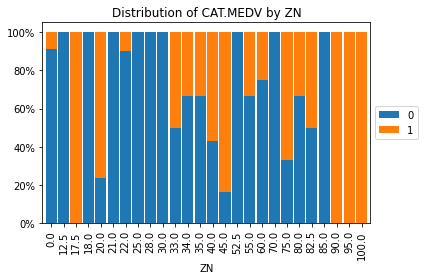

In [16]:
ax = propTbl.transpose().plot(kind='bar', stacked=True, width=0.9)
ax.set_yticklabels(['{:,.0%}'.format(x) for x in ax.get_yticks()])
plt.title('Distribution of CAT.MEDV by ZN')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

## Cereal dataset

1. Name: name of cereal
2. mfr: manufacturer
3. type: cold or hot
4. calories: calories per serving
5. protein: grams
6. fat: grams
7. sodium: mg.
8. fiber: grams
9. carbo: grams complex carbohydrates 
10. sugars: grams
11. potass: mg.
12. vitamins: % FDA rec
13. shelf: display shelf
14. weight: oz. 1 serving
15. cups: in one serving
16. rating: consumer reports

Compute principal components on two dimensions

In [17]:
cereals_df = pd.read_csv('datasets/Cereals.csv')
cereals_df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843


In [18]:
cereals_df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,76.000000,76.000000,75.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.802632,7.026316,98.666667,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,3.907326,4.378656,70.410636,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,42.500000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.500000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [19]:
pcs = PCA(n_components=2)
pcs.fit(cereals_df[['calories', 'rating']])

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

The importance of components can be assessed using the explained variance.

In [20]:
pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                           'Proportion of variance': pcs.explained_variance_ratio_,
                           'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary = pcsSummary.transpose()
pcsSummary.columns = ['PC1', 'PC2']
pcsSummary.round(4)

,PC1,PC2
Standard deviation,22.3165,8.8844
Proportion of variance,0.8632,0.1368
Cumulative proportion,0.8632,1.0000


The `components_` field of `pcs` gives the individual components. The columns in this matrix are the principal components `PC1`, `PC2`. The rows are variables in the order they are found in the input matrix, `calories` and `rating`.

In [21]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), columns=['PC1', 'PC2'], index=['calories', 'rating'])
pcsComponents_df

,PC1,PC2
calories,-0.847053,0.531508
rating,0.531508,0.847053


Use the `transform` method to get the scores.

In [22]:
scores = pd.DataFrame(pcs.transform(cereals_df[['calories', 'rating']]), columns=['PC1', 'PC2'])
scores.head()

,PC1,PC2
0,44.921528,2.197183
1,-15.725265,-0.382416
2,40.149935,-5.407212
3,75.310772,12.999126
4,-7.041508,-5.357686


## Perform a principal component analysis of the whole table ignoring the first three non-numerical columns.

In [23]:
pcs = PCA()
pcs.fit(cereals_df.iloc[:, 3:].dropna(axis=0))
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                              'Proportion of variance': pcs.explained_variance_ratio_,
                              'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Standard deviation,83.7641,70.9143,22.6437,19.1815,8.4232,2.0917,1.6994,0.7796,0.6578,0.3704,0.1864,0.063,0.0
Proportion of variance,0.5395,0.3867,0.0394,0.0283,0.0055,0.0003,0.0002,0.0000,0.0000,0.0000,0.0000,0.000,0.0
Cumulative proportion,0.5395,0.9262,0.9656,0.9939,0.9993,0.9997,0.9999,1.0000,1.0000,1.0000,1.0000,1.000,1.0


In [24]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), columns=pcsSummary_df.columns, 
                                index=cereals_df.iloc[:, 3:].columns)
pcsComponents_df.iloc[:,:5]

,PC1,PC2,PC3,PC4,PC5
calories,-0.077984,-0.009312,0.629206,-0.601021,0.454959
protein,0.000757,0.008801,0.001026,0.003200,0.056176
fat,0.000102,0.002699,0.016196,-0.025262,-0.016098
sodium,-0.980215,0.140896,-0.135902,-0.000968,0.013948
fiber,0.005413,0.030681,-0.018191,0.020472,0.013605
carbo,-0.017246,-0.016783,0.017370,0.025948,0.349267
sugars,-0.002989,-0.000253,0.097705,-0.115481,-0.299066
potass,0.134900,0.986562,0.036782,-0.042176,-0.047151
vitamins,-0.094293,0.016729,0.691978,0.714118,-0.037009
shelf,0.001541,0.004360,0.012489,0.005647,-0.007876


## Cereal dataset
These code snippets demonstrate how a similar graph could be generated using Python
Use the preprocessing functionality in scikit-learn to standardize the data before the PCA

In [25]:
pcs = PCA()
pcs.fit(preprocessing.scale(cereals_df.iloc[:, 3:].dropna(axis=0)))
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                              'Proportion of variance': pcs.explained_variance_ratio_,
                              'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Standard deviation,1.9192,1.7864,1.3912,1.0166,1.0015,0.8555,0.8251,0.6496,0.5658,0.3051,0.2537,0.1399,0.0
Proportion of variance,0.2795,0.2422,0.1469,0.0784,0.0761,0.0555,0.0517,0.0320,0.0243,0.0071,0.0049,0.0015,0.0
Cumulative proportion,0.2795,0.5217,0.6685,0.7470,0.8231,0.8786,0.9303,0.9623,0.9866,0.9936,0.9985,1.0000,1.0


In [26]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), columns=pcsSummary_df.columns, 
                                index=cereals_df.iloc[:, 3:].columns)
pcsComponents_df.iloc[:,:5]

,PC1,PC2,PC3,PC4,PC5
calories,-0.299542,-0.393148,0.114857,-0.204359,0.203899
protein,0.307356,-0.165323,0.277282,-0.300743,0.319749
fat,-0.039915,-0.345724,-0.204890,-0.186833,0.586893
sodium,-0.183397,-0.137221,0.389431,-0.120337,-0.338364
fiber,0.453490,-0.179812,0.069766,-0.039174,-0.255119
carbo,-0.192449,0.149448,0.562452,-0.087835,0.182743
sugars,-0.228068,-0.351434,-0.355405,0.022707,-0.314872
potass,0.401964,-0.300544,0.067620,-0.090878,-0.148360
vitamins,-0.115980,-0.172909,0.387859,0.604111,-0.049287
shelf,0.171263,-0.265050,-0.001531,0.638879,0.329101


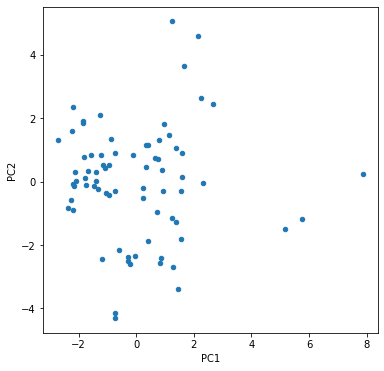

In [27]:
# from adjustText import adjust_text
cereals_red_df = cereals_df.dropna(axis=0)
cereals_red_df = cereals_red_df.reset_index(drop=True)

scores = pd.DataFrame(pcs.fit_transform(preprocessing.scale(cereals_red_df.iloc[:, 3:].dropna(axis=0))), 
                      columns=[f'PC{i}' for i in range(1, 14)])
cereals_pca_df = pd.concat([cereals_red_df['name'].dropna(axis=0), scores[['PC1', 'PC2']]], axis=1)
ax = cereals_pca_df.plot.scatter(x='PC1', y='PC2', figsize=(6, 6))
points = cereals_pca_df[['PC1','PC2','name']]

'''
texts = []
for _, (x, y, s) in points.iterrows():
        texts.append(ax.text(x, y, s))
adjust_text(texts, force_text=0.05, arrowprops=dict(arrowstyle="-|>", color='r', alpha=0.5))
'''
plt.show()

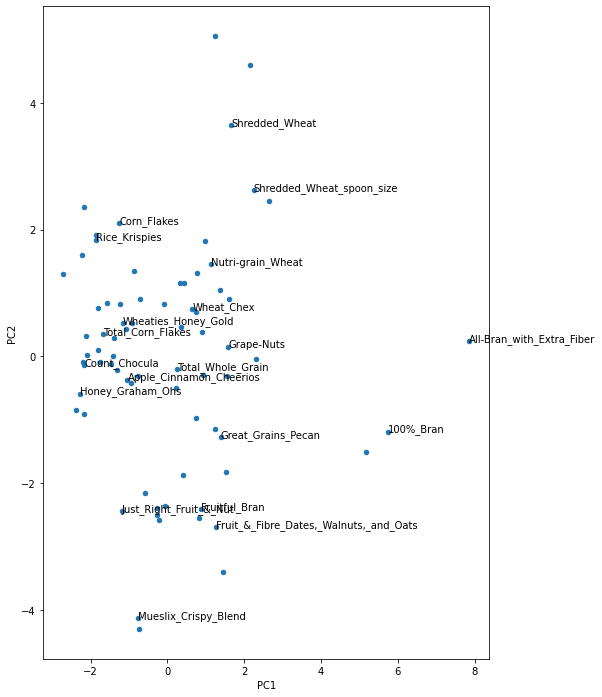

In [28]:
from sklearn.cluster import KMeans

cereals_pca_df = pd.concat([cereals_df['name'], scores], axis=1) #ignore_index=True)
ax = cereals_pca_df.plot.scatter(x='PC1', y='PC2', figsize=(8, 12))
points = pd.DataFrame(points)

def extract_point(df, texts):
    for _, (x, y, s) in df.sample(1)[['PC1','PC2','name']].iterrows():
        texts.append(ax.text(x, y, s))

kmeans = KMeans(n_clusters=20, random_state=0).fit(points[['PC1', 'PC2']])
points['cluster'] = kmeans.labels_
texts = []
points.groupby(['cluster']).apply(lambda g: extract_point(g, texts))

# adjust_text(texts, force_text=0.05, arrowprops=dict(arrowstyle="-|>", color='grey', alpha=0.5))
plt.show()

## Wine dataset

In [29]:
wine_df = pd.read_csv('datasets/Wine.csv')
wine_df = wine_df.drop(columns=['Type'])

In [30]:
pcs = PCA()
pcs.fit(wine_df.dropna(axis=0))
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                              'Proportion of variance': pcs.explained_variance_ratio_,
                              'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
Standard deviation,314.9632,13.1353,3.0722,2.2341,1.1085,0.9171,0.5282,0.3891,0.3348,0.2678,0.1938,0.1452,0.0906
Proportion of variance,0.9981,0.0017,0.0001,0.0001,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Cumulative proportion,0.9981,0.9998,0.9999,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [31]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), columns=pcsSummary_df.columns, 
                                index=wine_df.columns)
pcsComponents_df.iloc[:,:5]


,PC1,PC2,PC3,PC4,PC5
Alcohol,0.001659,0.001203,-0.016874,-0.141447,0.020337
Malic_Acid,-0.000681,0.002155,-0.122003,-0.160390,-0.612883
Ash,0.000195,0.004594,-0.051987,0.009773,0.020176
Ash_Alcalinity,-0.004671,0.026450,-0.938593,0.330965,0.064352
Magnesium,0.017868,0.999344,0.029780,0.005394,-0.006149
Total_Phenols,0.000990,0.000878,0.040485,0.074585,0.315245
Flavanoids,0.001567,-0.000052,0.085443,0.169087,0.524761
Nonflavanoid_Phenols,-0.000123,-0.001354,-0.013511,-0.010806,-0.029648
Proanthocyanins,0.000601,0.005004,0.024659,0.050121,0.251183
Color_Intensity,0.002327,0.015100,-0.291398,-0.878894,0.331747
